This notebook showcases the Modshift vetter.

"**Description of Modshift, history, papers, and what it's used for**"

In [10]:
from exovetter.tce import Tce
import lightkurve as lk
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib inline

Exovetter vetting alogrithms use TCE and lightkurve objects as input, the following TCE and light curve files were made for the known planet WASP-18 b in the TCE and lightcurves notebooks. 

In [8]:
# WASP-18 b TCE:
tce = Tce.from_json('wasp18b_tce')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<Figure size 640x480 with 0 Axes>

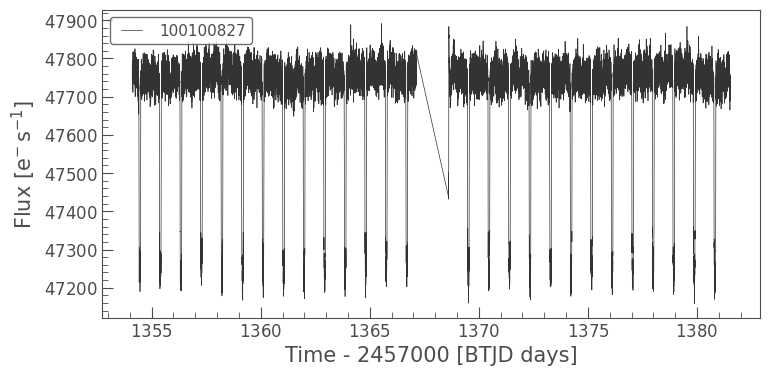

In [7]:
# Cleaned WASP-18 b lightkurve object
lc = lk.read('WASP18b_lightcurve.fits')

# plot light curve
plt.figure()
lc.plot()
plt.show()

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.Modshift`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [15]:
modshift_instance = vet.ModShift()
modshift_results = modshift_instance.run(tce, lc)

modshift_results

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch
with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


{'pri': 0,
 'phase_pri': 0.0,
 'sec': 53,
 'phase_sec': 0.47520922085714284,
 'ter': 0,
 'phase_ter': 0.0,
 'pos': nan,
 'phase_pos': nan,
 'sigma_pri': -83622.12883039654,
 'sigma_sec': -2048.777692452019,
 'sigma_ter': -83622.12883039654,
 'sigma_pos': nan,
 'false_alarm_threshold': 1.6702257749203022,
 'Fred': 100.02703929500919}

In modshift, the results are as follows: "**Better description of these results/attributes and their use"**
* pri : primary signal
* sec : secondary signal
* ter : tertiary signal
* pos : largest positive event
* false_alarm_threshold : threshold for the 1 sigma false alarm
* Fred : red noise level, std(convolution) divided by std(lightcurve)

The following attributes are also available after running the vetter object:
* time : Time values of the TCE.
* flux : Flux values of the TCE.
* period_days : Period of the TCE in days.
* epoch_days : Epoch of the TCE in days.
* duration_hrs : Transit duration of the TCE in hours.
* box : Flux from boxcar model of the TCE.
* metrics : Modshift result dictionary. 

In order to generate diagnostic plots from vetters, we can either use the `plot` method with the vetter object after it has been run, or use `plot=True` as a parameter to the `run` method to do both run and plot at the same time

<Figure size 640x480 with 0 Axes>

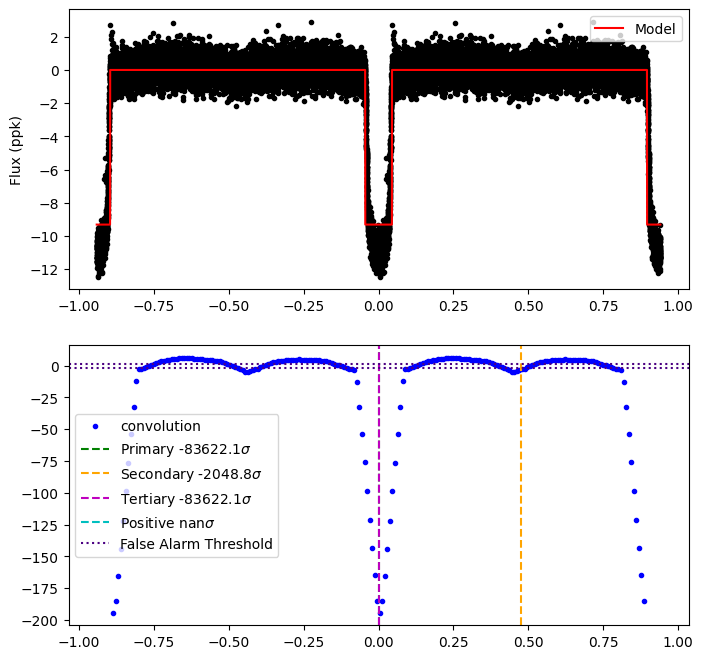

In [16]:
plt.figure()
modshift_instance.plot()
plt.show()

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch
with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


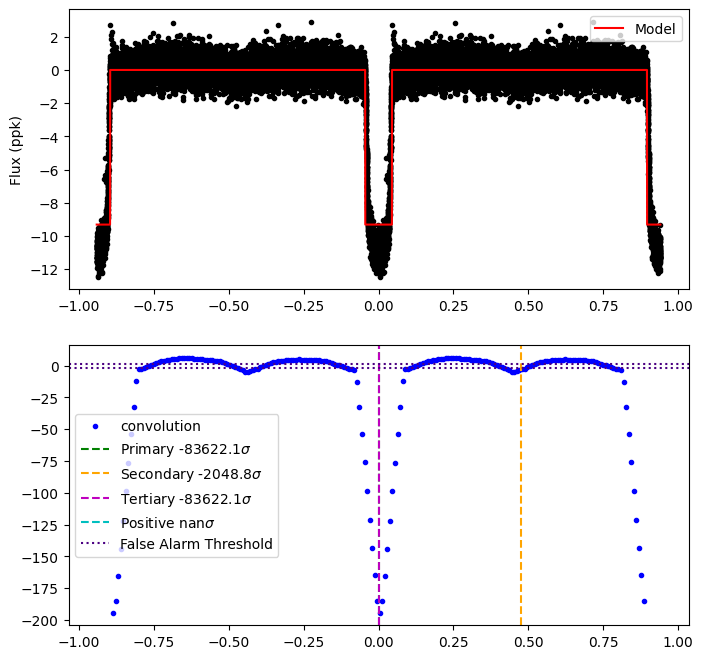

In [17]:
modshift_results = modshift_instance.run(tce, lc, plot=True)